In [1]:
# pandas 라이브러리를 Import하기

import pandas as pd


In [3]:
# 데이터 파일을 읽어오기
rock_samples = pd.read_csv('data/rocksamples.csv')

In [12]:
# 데이터프레임 처음과 마지막 5개행 확인하기

rock_samples.head() # 처음 5개행
rock_samples.tail() # 마지막 5개행

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
2224,79528,Apollo17,Breccia,Regolith,2.38,100.0
2225,79529,Apollo17,Breccia,Regolith,1.84,100.0
2226,79535,Apollo17,Breccia,Regolith,1.69,100.0
2227,79536,Apollo17,Breccia,Regolith,1.66,100.0
2228,79537,Apollo17,Breccia,Regolith,1.05,100.0


In [ ]:
#rock_samples 데이터프레임 정보 확인하기
rock_samples.info()

# RangeIndex: 2229 entries, 0 to 2228
#  3   Subtype       2226 non-null   object -> 결측치 3개 존재


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


In [263]:
#rock_samples 데이터프레임 행수 확인
len(rock_samples)

2229

In [265]:
#rock_samples 데이터 프레임의 인덱스 확인
rock_samples.index

RangeIndex(start=0, stop=2229, step=1)

In [268]:
#rock_samples 데이터프레임 열수 확인
print(rock_samples.shape[1])

7


In [269]:
#rock_samples 데이터프레임의 모양 확인
rock_samples.shape

(2229, 7)

In [272]:
#rock_samples 데이터프레임의 컬럼명 확인
rock_samples.columns

Index(['ID', 'Mission', 'Type', 'Subtype', 'Weight (kg)', 'Pristine (%)',
       'Remaining (kg)'],
      dtype='object')

In [278]:
#rock_samples 데이터프레임 컬럼들의 데이터타입 확인
rock_samples.dtypes

ID                  int64
Mission            object
Type               object
Subtype            object
Weight (kg)       float64
Pristine (%)      float64
Remaining (kg)    float64
dtype: object

In [ ]:
# rock_samples 데이터프레임 수치 데이터의 요약 통계 확인
rock_samples.describe()

# pristine (%) -> 남아있는 양인데, 180% ?
# 양이 적은 샘플들을 기준으로 측정해야겠다.

,ID,Weight (g),Pristine (%)
count,2229.000000,2229.000000,2229.000000
mean,52058.432032,168.253024,84.512764
std,26207.651471,637.286458,22.057299
min,10001.000000,0.000000,0.000000
25%,15437.000000,3.000000,80.010000
50%,65527.000000,10.200000,92.300000
75%,72142.000000,93.490000,98.140000
max,79537.000000,11729.000000,180.000000


## 각 컬럼별 누락값 검사

In [ ]:
# 1단계 -> rock_samples 데이터프레임에 null값이 있는지 확인
rock_samples.isnull()

# 중간생략으로 결측치 확인이 어렵다!

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2224,False,False,False,False,False,False
2225,False,False,False,False,False,False
2226,False,False,False,False,False,False
2227,False,False,False,False,False,False


In [ ]:
#결측치 갯수 확인인. false:0, True:1
rock_samples.isnull().sum()

#subtype에 결측지 3개 있음을 확인함 -> 처리가 필요해.

ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64

In [27]:
# 결측치가 있는 행만 출력해 주세요.

# 1. rock_samples['Subtype'].isnull() 
rock_samples[rock_samples['Subtype'].isnull()]
# -> 서브타입에만 null이 있는 경우

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
89,12023,Apollo12,Special,NaN,407.90,66.89
355,15014,Apollo15,Special,NaN,333.20,100.00
1513,70149,Apollo17,Basalt,NaN,0.95,0.00


In [28]:

# [심화]
# 3. rock_samples[rock_samples.isnull()]
# -> nulll이 있는 경우 모두

rock_samples[rock_samples.isnull().any(axis=1)]
# -> 행 단위로 isnull을 찾아줘
# `axis`는 **연산을 수행하는 방향**을 지정하는 개념이야.

# `axis=0` → **세로 방향** (행을 따라 연산, 즉 열 단위로 처리)
# `axis=1` → **가로 방향** (열을 따라 연산, 즉 행 단위로 처리)

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
89,12023,Apollo12,Special,NaN,407.90,66.89
355,15014,Apollo15,Special,NaN,333.20,100.00
1513,70149,Apollo17,Basalt,NaN,0.95,0.00


## 컬럼값 변환 : weight(g) -> weight(kg)
    

In [ ]:
rock_samples.head(2)

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,125.8,88.36
1,10002,Apollo11,Soil,Unsieved,5629.0,93.73


In [30]:
rock_samples['Weight (g)']

0        125.80
1       5629.00
2        213.00
3         44.80
4         53.40
         ...   
2224       2.38
2225       1.84
2226       1.69
2227       1.66
2228       1.05
Name: Weight (g), Length: 2229, dtype: float64

In [ ]:

# 1단계 -> 컬럼값변환 : 
# rock_samples['Weight (g)'] -> rock_samples['Weight (kg)']

rock_samples['Weight (g)']=rock_samples['Weight (g)'].apply(lambda x:x*0.001)

# 각각을 /1000
# rock_samples['Weight (g)']/1000 <-다른 방법

In [48]:
rock_samples.head()


,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56
3,10004,Apollo11,Core,Unsieved,0.0448,71.76
4,10005,Apollo11,Core,Unsieved,0.0534,40.31


In [ ]:

#2단계 -> 컬럼명 변환 : 'Weight(g)' -> 'Weight(kg)


# rock_samples.columns['Weight (g)']=['Weight (kg)']
    # TypeError: Index does not support mutable operations 오류 발생

# rock_samples.columns = ['ID''Mission', 'Type','Subtype', 'Weight (kg)', 'Pristine (%)]
    # rock_samples.columns[] : 전체 열 이름을 한꺼번에 바꿈. 리스트 길이는 기존 컬럼 수와 같아야함!


# rock_samples.rename(columns={'Weight (g)': 'Weight (kg)'})
    # rename : 이름 변경을 원하는 컬럼을 선택해서 변경 가능함 
    # 컬럼 변경 된 것 확인 후! inplace=True사용 하여 적용

rock_samples.rename(columns={'Weight (g)': 'Weight (kg)'},inplace=True)

In [51]:
rock_samples.head()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56
3,10004,Apollo11,Core,Unsieved,0.0448,71.76
4,10005,Apollo11,Core,Unsieved,0.0534,40.31


## 아폴로 임무별 데이터 프레임 만들기 : missions

In [52]:
# 빈 데이터 프레임을 만들고 변수 missions에 할당한다.
missions=pd.DataFrame()

In [280]:
type(missions)

pandas.core.frame.DataFrame

In [54]:
#rock_samples['Mission']의 중복되지 않은 고유값들을 알아본다.
rock_samples['Mission'].unique()

array(['Apollo11', 'Apollo12', 'Apollo14', 'Apollo15', 'Apollo16',
       'Apollo17'], dtype=object)

In [55]:
rock_samples['Type'].unique()

array(['Soil', 'Basalt', 'Core', 'Breccia', 'Special', 'Crustal'],
      dtype=object)

In [57]:
#위의 값들을 mission 데이터프레임의 새로운 컬럼인 mission['Mission']에 할당한다.

missions['Mission']=rock_samples['Mission'].unique()
missions

,Mission
0,Apollo11
1,Apollo12
2,Apollo14
3,Apollo15
4,Apollo16
5,Apollo17


#### 아폴로 임무별 샘플 중량 총합

In [ ]:
# rock_samples 데이터프레임의 'Mission' 컬럼을 기준으로 그룹으로 나눈다
    # groupby()
# 나누어진 그룹에서 'weight (kg)' 컬럼의 총합을 구한다
    # groupby('Mission')['weight (kg)].sum()
# 결국 아폴로 달탐사 임무별로 수집해온 암석 샘플 총중량을 구해서 새로운 변수에 할당한다.
    # 이 변수는 시리즈이다.


Mission
Apollo11     21.55424
Apollo12     34.34238
Apollo14     41.83363
Apollo15     75.39910
Apollo16     92.46262
Apollo17    109.44402
Name: Weight (kg), dtype: float64

In [59]:
total_weight=rock_samples.groupby('Mission')['Weight (kg)'].sum()
total_weight

Mission
Apollo11     21.55424
Apollo12     34.34238
Apollo14     41.83363
Apollo15     75.39910
Apollo16     92.46262
Apollo17    109.44402
Name: Weight (kg), dtype: float64

In [60]:
type(total_weight)

pandas.core.series.Series

In [ ]:
# missions 데이터프레임과 sample_total_weight 시리즈를 병합한다.
    # pd.merge(left series, right series, on ='' )

missions=pd.merge(missions, total_weight, on = 'Mission')

In [63]:
missions

,Mission,Weight (kg)
0,Apollo11,21.55424
1,Apollo12,34.34238
2,Apollo14,41.83363
3,Apollo15,75.39910
4,Apollo16,92.46262
5,Apollo17,109.44402


In [68]:
# 컬럼명을 'Weight (kg)' 을 'Sample weight (kg)'으로 변경한다.
missions=missions.rename(columns={'Weight (kg)':'Sample weight (kg)'})

In [283]:
# 임무간 중량 차이 구하기
    # missions['컬럼명'].diff() : 이전 행과의 차이 계산
missions['Sample weight (kg)'].diff()

0         NaN
1    12.78814
2     7.49125
3    33.56547
4    17.06352
5    16.98140
Name: Sample weight (kg), dtype: float64

In [70]:
# 아폴로 임무간의 수집해온 암석 샘플 총중량 차이를 나타내는 컬럼 'Weight diff'를 missions 데이터프레임에 추가
missions['Weight diff']=missions['Sample weight (kg)'].diff()
missions

,Mission,Sample weight (kg),Weight diff
0,Apollo11,21.55424,NaN
1,Apollo12,34.34238,12.78814
2,Apollo14,41.83363,7.49125
3,Apollo15,75.39910,33.56547
4,Apollo16,92.46262,17.06352
5,Apollo17,109.44402,16.98140


In [ ]:
# 아폴로 11은 그 전 달탐사가 없어 NaN 값을 가지므로 결측치 0으로 채우기
    # df.fillna(0) : NaN을 모두 0으로 채움
    # df.fillna('모름') : NaN을 모두 '모름'으로 채움
    # df['컬럼명'].fillna(999) : 특정 컬럼의 NaN을 999로 채움
    # df.fillna(method='ffill') : NaN을 위의 값으로 채움 (forward fill)
    # df.fillna(method='bfill') : NaN을아래 값으로 채움 (behind fill)
    # df.fillna(0, inplace=True) : NaN을 0으로 원본 df를 바로 수정
    # df.fillna(method='ffill',limit=2) : NaN을 최대 몇 개까지만 채울지 지정

missions.fillna(value=0)

,Mission,Sample weight (kg),Weight diff
0,Apollo11,21.55424,0.00000
1,Apollo12,34.34238,12.78814
2,Apollo14,41.83363,7.49125
3,Apollo15,75.39910,33.56547
4,Apollo16,92.46262,17.06352
5,Apollo17,109.44402,16.98140


In [73]:
# 아폴로 11은 그 전 달탐사가 없어 NaN 값을 가지므로 결측치 0으로 채운 것을 확정하기
missions.fillna(value=0, inplace=True)
missions

,Mission,Sample weight (kg),Weight diff
0,Apollo11,21.55424,0.00000
1,Apollo12,34.34238,12.78814
2,Apollo14,41.83363,7.49125
3,Apollo15,75.39910,33.56547
4,Apollo16,92.46262,17.06352
5,Apollo17,109.44402,16.98140


In [74]:
# 달탐사선 = 달모듈 + 명령모듈 --> 이 둘을 합쳐서 승무원 모듈 데이터
달모듈이름 = ['Eagle (LM-5)', 'Intrepid (LM-6)', 'Antares (LM-8)', 'Falcon (LM-10)', 'Orion (LM-11)', 'Challenger (LM-12)']
달모듈중량 = [15103, 15235, 15264, 16430, 16445, 16456]


In [75]:
# 달 모듈의 이름, 중량 컬럼을 missions 데이터프레임에 추가
missions['Lunar module (LM)']=달모듈이름
missions['LM mass (kg)']=달모듈중량
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456


In [ ]:
# 아폴로 임무별로 달모듈 중량 차이를 구해서 새로운 컬럼 'LM mass diff'를 만들어서, missions 데이터프레임에 추가
missions['LM mass diff']=missions['LM mass (kg)'].diff()
missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,NaN
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0


In [80]:
# 결측치가 있다면 0으로 채우기
missions.fillna(value=0,inplace=True)
missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0


In [82]:
#명령모듈의 이름, 중량 컬럼을 missionms 데이터프레임에 추가
명령모듈이름 = ['Columbia (CSM-107]', 'Yankee Clipper (CM-100])', 'Kitty Hawk (CM-110)', 'Endeavor (CM-112)', 'Casper (CM-113)', 'America (CM-114)']
명령모듈중량 = [5560, 5609, 5758, 5875, 5840, 5960]

missions['Command Module (CM)']=명령모듈이름
missions['CM Mass (kg)']=명령모듈중량
missions



,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960


In [85]:
#임무간 명령 모듈 중량 차이 구하기기
#아폴로 임무별로 명령모듈 중량 차이를 구해서 새로운 컬럼 'CM Mass diff'를 만들어 missions 데이터프레임에 추가
#결측치 0으로 바꾸기
missions['CM mass diff']=missions['CM Mass (kg)'].diff()
missions.fillna(value=0,inplace=True)
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0


In [97]:
# 승무원영역 = 달모듈 + 명령모듈
# 달 모듈과 명령모듈 중량을 합한 값을 'Total weight (kg)'라는 새로운 컬럼을 만들어 missions 데이터프레임에 추가
missions['Total weight (kg)']=missions['LM mass (kg)']+missions['CM Mass (kg)']
missions

# missions.iloc[:,4]+missions.iloc[:,-3] <- iloc를 활용하는 방법

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg)
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416


In [98]:
# 승무원 영역을 나타내는 'Total weight (kg)'의 아폴로 임무별 중량 차이를 구하는 새로운 컬럼 'Total weight diff'를 missions 데이터프레임에 추가
missions['Total weight diff']=missions['Total weight (kg)'].diff()
missions
missions.fillna(value=0,inplace=True)
missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0


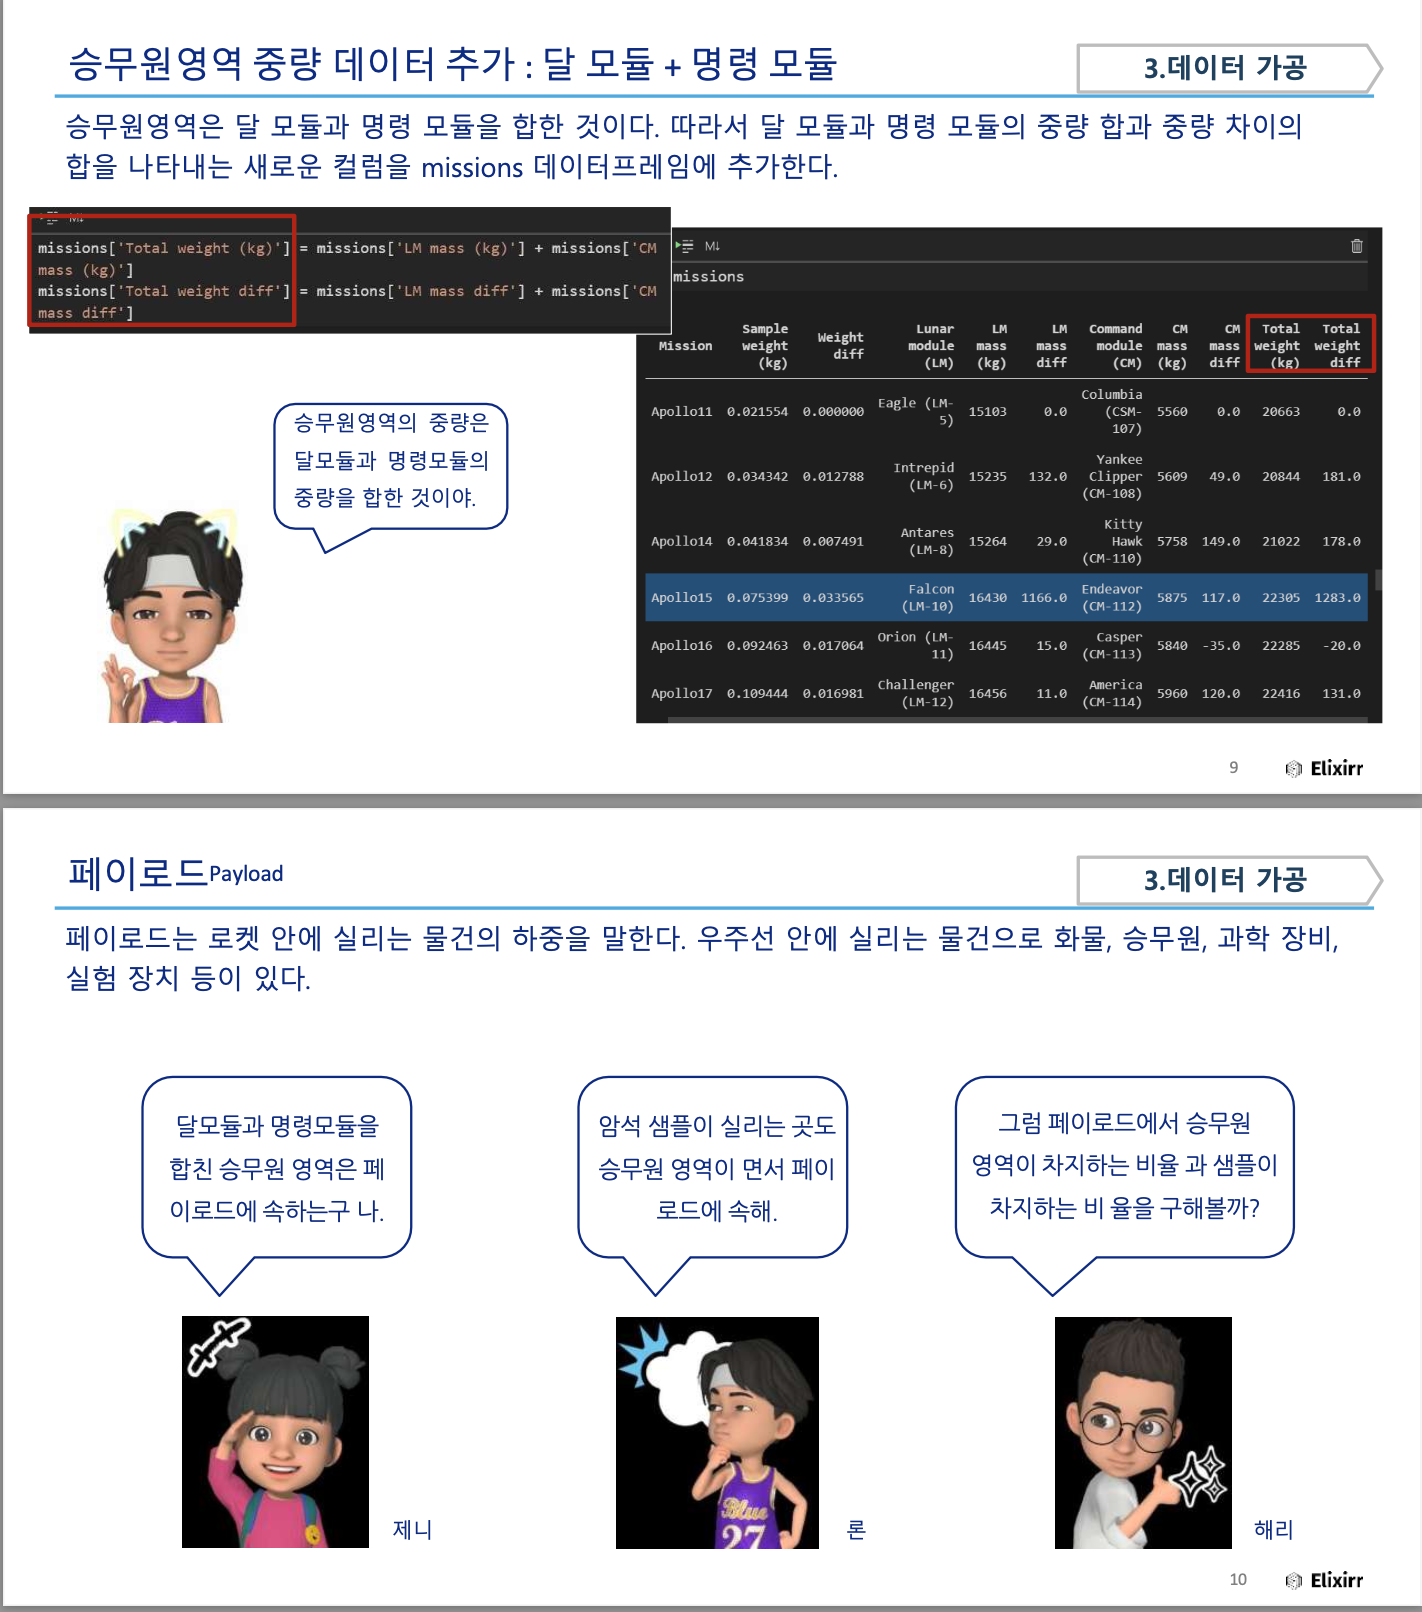

In [ ]:
# 페이로드에서 승무원 영역이 차지하는 비율 구하기 -> 'Crewed area : Payload'
saturnVPayload = 43500
missions['Crewed area : Payload'] = missions['Total weight (kg)'] / saturnVPayload
missions


,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310


In [100]:
# 승무원 영역에서 암석 샘플이 차지하는 비율 구하기 -> 'Sample : Crewed area'
missions['Sample : Crewed area'] = missions['Sample weight (kg)'] / missions['Total weight (kg)']
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload,Sample : Crewed area
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011,0.001043
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172,0.001648
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001990
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003380
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004882


In [101]:
# 페이로드에서 샘플이 차지하는 비율 구하기 -> 'Sample : Payload'
missions['Sample : Payload'] = missions['Sample weight (kg)'] / saturnVPayload
missions

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload,Sample : Crewed area,Sample : Payload
0,Apollo11,21.55424,0.00000,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011,0.001043,0.000495
1,Apollo12,34.34238,12.78814,Intrepid (LM-6),15235,132.0,Yankee Clipper (CM-100]),5609,49.0,20844,181.0,0.479172,0.001648,0.000789
2,Apollo14,41.83363,7.49125,Antares (LM-8),15264,29.0,Kitty Hawk (CM-110),5758,149.0,21022,178.0,0.483264,0.001990,0.000962
3,Apollo15,75.39910,33.56547,Falcon (LM-10),16430,1166.0,Endeavor (CM-112),5875,117.0,22305,1283.0,0.512759,0.003380,0.001733
4,Apollo16,92.46262,17.06352,Orion (LM-11),16445,15.0,Casper (CM-113),5840,-35.0,22285,-20.0,0.512299,0.004149,0.002126
5,Apollo17,109.44402,16.98140,Challenger (LM-12),16456,11.0,America (CM-114),5960,120.0,22416,131.0,0.515310,0.004882,0.002516


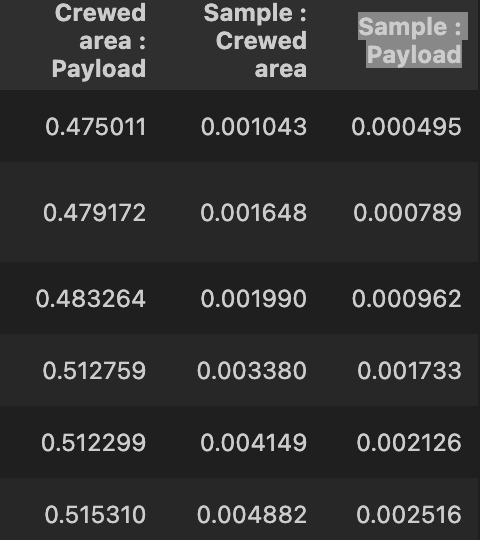

페이로드의 비중과 승무원 역역의 비중도 미션이 지날 수록 늘어난 것을 알 수 있다. (암석 채취량도 늘어나고 있다)

## artemis_mission 데이터프레임 만들기

In [102]:
artemis_crewedArea = 26520

artemis_dict = {'Mission' : ['artemis1', 'artemis1b', 'artemis2'],
                'Total weight (kg)' : [artemis_crewedArea, artemis_crewedArea, artemis_crewedArea],
                'Payload (kg)' : [26988, 37965, 42955]
               }

#딕셔너리를 데이터 프레임으로 저장하기
#payload (kg)는 예측치이다.
artemis_mission=pd.DataFrame(artemis_dict)
artemis_mission

,Mission,Total weight (kg),Payload (kg)
0,artemis1,26520,26988
1,artemis1b,26520,37965
2,artemis2,26520,42955


In [103]:
missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission                6 non-null      object 
 1   Sample weight (kg)     6 non-null      float64
 2   Weight diff            6 non-null      float64
 3   Lunar module (LM)      6 non-null      object 
 4   LM mass (kg)           6 non-null      int64  
 5   LM mass diff           6 non-null      float64
 6   Command Module (CM)    6 non-null      object 
 7   CM Mass (kg)           6 non-null      int64  
 8   CM mass diff           6 non-null      float64
 9   Total weight (kg)      6 non-null      int64  
 10  Total weight diff      6 non-null      float64
 11  Crewed area : Payload  6 non-null      float64
 12  Sample : Crewed area   6 non-null      float64
 13  Sample : Payload       6 non-null      float64
dtypes: float64(8), int64(3), object(3)
memory usage: 804.0+ bytes


In [106]:
# missions 데이터프레임에서 'Crewed area : Payload', 'Sample : Crewed area', 'Sample : Payload' 의 평균값을 구한다.

Crewedarea_Payload_ratio=missions['Crewed area : Payload'].mean()
Sample_Crewed_area_ratio=missions['Sample : Crewed area'].mean()
Sample_Payload_ratio=missions['Sample : Payload'].mean()

print(Crewedarea_Payload_ratio)
print(Sample_Crewed_area_ratio)
print(Sample_Payload_ratio)

0.4963026819923371
0.002848764392685611
0.0014369195019157087


In [109]:
missions.head(1)

,Mission,Sample weight (kg),Weight diff,Lunar module (LM),LM mass (kg),LM mass diff,Command Module (CM),CM Mass (kg),CM mass diff,Total weight (kg),Total weight diff,Crewed area : Payload,Sample : Crewed area,Sample : Payload
0,Apollo11,21.55424,0.0,Eagle (LM-5),15103,0.0,Columbia (CSM-107],5560,0.0,20663,0.0,0.475011,0.001043,0.000495


In [111]:
# missions 데이터프레임에서 'Sample weight (kg)'의 총합을 구한다.
print(missions['Sample weight (kg)'].sum())

375.03598999999997


In [116]:
#artemis_missions 데이터 프레임에 'Sample weight from total (kg)' 컬럼을 추가한다.

artemis_mission['Sample weight from total (kg)']=artemis_mission['Total weight (kg)']*Sample_Crewed_area_ratio
artemis_mission


,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg)
0,artemis1,26520,26988,75.549232
1,artemis1b,26520,37965,75.549232
2,artemis2,26520,42955,75.549232


In [117]:
#artemis_mission 데이터프레임에 'Sample weight from payload (kg)' 컬럼을 추가한다.
artemis_mission['Sample weight from payload (kg)']=artemis_mission['Payload (kg)']*Sample_Payload_ratio
artemis_mission



,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg)
0,artemis1,26520,26988,75.549232,38.779584
1,artemis1b,26520,37965,75.549232,54.552649
2,artemis2,26520,42955,75.549232,61.722877


In [119]:
# artemis_mission 데이터프레임에 'Estimated sample weight (kg)' 컬럼을 추가한다.
artemis_mission['Estimated sample weight (kg)']=(artemis_mission['Sample weight from total (kg)']+artemis_mission['Sample weight from payload (kg)'])/2
artemis_mission

# 아르테미스 임무에서 가져올 암석의 무게 구하기 완료!! (페이로드와 승무원영역들의 무게를 확인하여 암석 무게를 가정함)

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.549232,38.779584,57.164408
1,artemis1b,26520,37965,75.549232,54.552649,65.050940
2,artemis2,26520,42955,75.549232,61.722877,68.636054


##아르테미스 임무에서 가져올 암석 종류 구하기

In [121]:
# rock_samples의 5개 정보 확인하기
rock_samples.head()

# Pristine (%) : 사용하고 나서 남아 있는 암석 샘플의 양

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56
3,10004,Apollo11,Core,Unsieved,0.0448,71.76
4,10005,Apollo11,Core,Unsieved,0.0534,40.31


In [122]:
0.1258*88.36

11.115687999999999

In [123]:
# rock_samples 데이터프레임에 암석샘플의 남은 양을 나타내는 'Remaining (kg)' 컬럼추가
rock_samples['Remaining (kg)']=rock_samples['Weight (kg)']*rock_samples['Pristine (%)']*0.01
rock_samples.head(3)

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36,0.111157
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73,5.276062
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56,0.139643


In [ ]:
# rock_samples 수치데이터 요약 통계 확인
rock_samples.describe()



,ID,Weight (kg),Pristine (%),Remaining (kg)
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,52058.432032,0.168253,84.512764,0.138103
std,26207.651471,0.637286,22.057299,0.525954
min,10001.000000,0.000000,0.000000,0.000000
25%,15437.000000,0.003000,80.010000,0.002432
50%,65527.000000,0.010200,92.300000,0.008530
75%,72142.000000,0.093490,98.140000,0.078240
max,79537.000000,11.729000,180.000000,11.169527


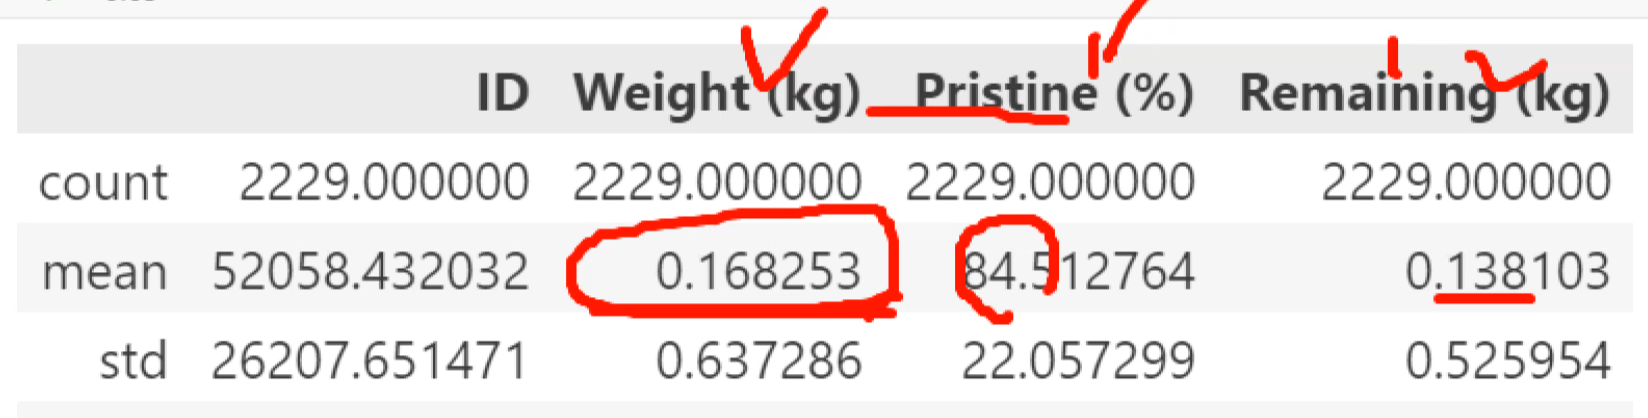
아르테미스에서 채취한 암석의 평균 무게는 0.16kg, 남아있는 양이 84%, 남아있는 양은 0.13kg -> 데이터 읽기

무게는 0.16kg 이상, 남아있는 양이 50% 이하로 가정해서 데이터를 확인해보자.

In [128]:
# rock_samples['Weight (kg)']의 모든 값이 0.16kg 이상 인지 확인
rock_samples['Weight (kg)']>=0.16

0       False
1        True
2        True
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Name: Weight (kg), Length: 2229, dtype: bool

In [130]:
# rock_samples['Weight (kg)']이 0.16kg 이상 이면서 rock_samples['Pristine (%)']이 50 이하인지 확인
rock_samples[(rock_samples['Weight (kg)']>=0.16) & (rock_samples['Pristine (%)']<= 50)]

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.9730,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.4250,27.88,0.118490
15,10021,Apollo11,Breccia,Regolith,0.2500,30.21,0.075525
29,10045,Apollo11,Basalt,Olivine,0.1850,12.13,0.022441
37,10057,Apollo11,Basalt,Ilmenite,0.9190,35.15,0.323028
39,10059,Apollo11,Breccia,Regolith,0.1880,36.94,0.069447
52,10072,Apollo11,Basalt,Ilmenite,0.4470,15.22,0.068033
59,10086,Apollo11,Soil,Unsieved,0.8230,0.01,0.000082
68,12002,Apollo12,Basalt,Olivine,1.5300,49.04,0.750312
69,12003,Apollo12,Soil,Unsieved,0.3000,28.52,0.085560


In [132]:
#위의 두 조건을 모두 만족하는 행만 추출해서 low_samples라는 데이터 프레임을 만든다.

low_samples=rock_samples[(rock_samples['Weight (kg)']>=0.16) & (rock_samples['Pristine (%)']<= 50)]
low_samples.tail()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
718,60016,Apollo16,Breccia,Fragmental,4.3070,49.57,2.134980
722,60025,Apollo16,Breccia,Anorthosite,1.8360,43.61,0.800680
1221,66075,Apollo16,Breccia,Fragmental,0.3471,32.97,0.114439
1645,71566,Apollo17,Basalt,Ilmenite,0.4144,45.06,0.186729
2183,79155,Apollo17,Basalt,Ilmenite,0.3188,25.97,0.082792


In [133]:
low_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 to 2183
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              27 non-null     int64  
 1   Mission         27 non-null     object 
 2   Type            27 non-null     object 
 3   Subtype         27 non-null     object 
 4   Weight (kg)     27 non-null     float64
 5   Pristine (%)    27 non-null     float64
 6   Remaining (kg)  27 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.7+ KB


In [137]:
low_samples['Type'].unique()

array(['Basalt', 'Breccia', 'Soil', 'Core'], dtype=object)

In [138]:
# low_samples 데이터프레임에서 암석유형('Type')별로 개수를 센다.
low_samples.groupby("Type")['ID'].count()

Type
Basalt     14
Breccia     8
Core        1
Soil        4
Name: ID, dtype: int64

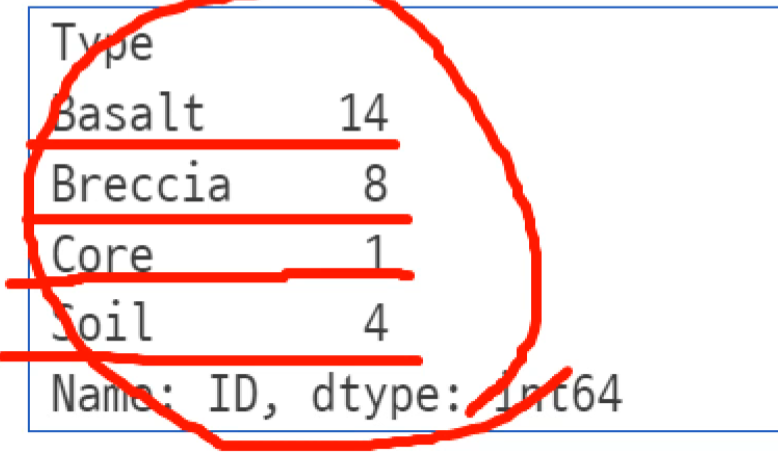

Basalt와 Breccia가 채취하는 암석 중에 의미가 높은 암석이라 가정을 해본다.

In [53]:
#low_samples['Type']의 값이 'Basalt'이거나 'Breccia' 인지 확인 -> isin(리스트)


11       True
14       True
15       True
29       True
37       True
39       True
52       True
59      False
68       True
69      False
72       True
94      False
113      True
118      True
120      True
353     False
354     False
426      True
534      True
570      True
575      True
607      True
718      True
722      True
1221     True
1645     True
2183     True
Name: Type, dtype: bool

In [154]:
# | <- or 비트라이즈 연산자 사용
# low_samples['Type'] 의 값이 'Basalt'이거나 'Breccia'인 행만 추출해서 needed_samples 데이터프레임 만들기
(low_samples['Type']== 'Basalt') | (low_samples['Type']=='Breccia')

11       True
14       True
15       True
29       True
37       True
39       True
52       True
59      False
68       True
69      False
72       True
94      False
113      True
118      True
120      True
353     False
354     False
426      True
534      True
570      True
575      True
607      True
718      True
722      True
1221     True
1645     True
2183     True
Name: Type, dtype: bool

In [151]:
# lambda x : 사용
# low_samples['Type'] 의 값이 'Basalt'이거나 'Breccia'인 행만 추출해서 needed_samples 데이터프레임 만들기 
low_samples['Type'].apply(lambda x : x in ['Basalt','Breccia'])

11       True
14       True
15       True
29       True
37       True
39       True
52       True
59      False
68       True
69      False
72       True
94      False
113      True
118      True
120      True
353     False
354     False
426      True
534      True
570      True
575      True
607      True
718      True
722      True
1221     True
1645     True
2183     True
Name: Type, dtype: bool

In [153]:
# isin()사용
# low_samples['Type'] 의 값이 'Basalt'이거나 'Breccia'인 행만 추출해서 needed_samples 데이터프레임 만들기 

needed_samples=low_samples[low_samples['Type'].isin(['Basalt','Breccia'])]
needed_samples

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.9730,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.4250,27.88,0.118490
15,10021,Apollo11,Breccia,Regolith,0.2500,30.21,0.075525
29,10045,Apollo11,Basalt,Olivine,0.1850,12.13,0.022441
37,10057,Apollo11,Basalt,Ilmenite,0.9190,35.15,0.323028
39,10059,Apollo11,Breccia,Regolith,0.1880,36.94,0.069447
52,10072,Apollo11,Basalt,Ilmenite,0.4470,15.22,0.068033
68,12002,Apollo12,Basalt,Olivine,1.5300,49.04,0.750312
72,12006,Apollo12,Basalt,Olivine,0.2064,0.53,0.001094
113,12047,Apollo12,Basalt,Ilmenite,0.1930,33.70,0.065041


In [155]:
# needed_samples 정보확인
needed_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 11 to 2183
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              22 non-null     int64  
 1   Mission         22 non-null     object 
 2   Type            22 non-null     object 
 3   Subtype         22 non-null     object 
 4   Weight (kg)     22 non-null     float64
 5   Pristine (%)    22 non-null     float64
 6   Remaining (kg)  22 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [156]:
needed_samples['Type'].value_counts()

Type
Basalt     14
Breccia     8
Name: count, dtype: int64

In [158]:
# needed_samples 데이터프레임에서 'Type'으로 groupby해서 암석 샘플의 총중량의 합을 구한다
needed_samples.groupby('Type')['Weight (kg)'].sum()


Type
Basalt     17.4234
Breccia    10.1185
Name: Weight (kg), dtype: float64

In [159]:
# rock_samples 데이터프레임에서 'Type'으로 groupby 해서 암석 샘플의 중량의 합을 구한다. 
#           -> 아폴로 임무에서 처음부터 수집이 안된 암석을 구한다.

rock_samples.groupby('Type')['Weight (kg)'].sum()


Type
Basalt      93.14077
Breccia    168.88075
Core        19.93587
Crustal      4.74469
Soil        87.58981
Special      0.74410
Name: Weight (kg), dtype: float64

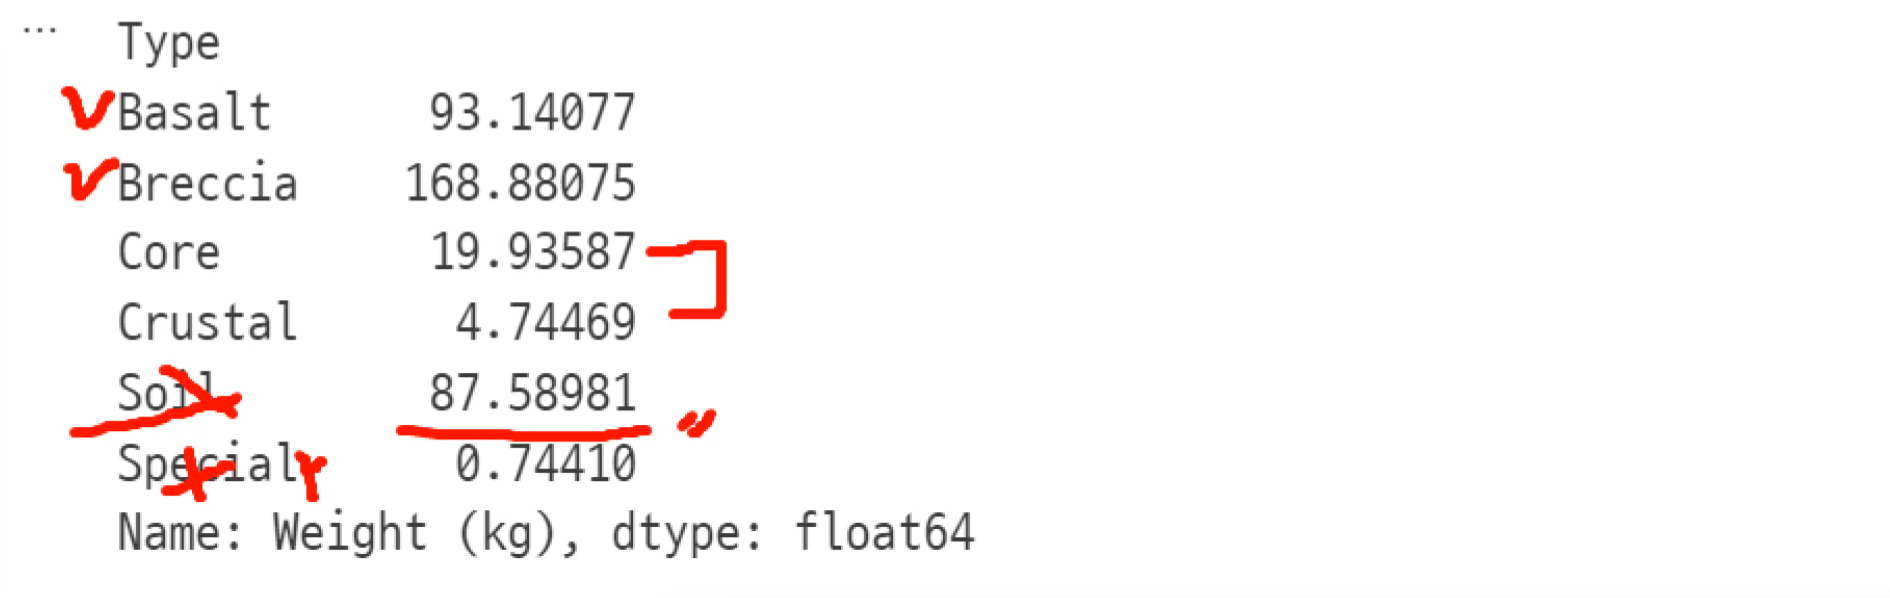

6번의 임무 중, 채취한 암석의 총량  
Basalt      93.14077 < 총량이 많음  
Breccia    168.88075 < 총량이 많음  
Core        19.93587 < 총량이 많지 않음  
Crustal      4.74469 < 총량이 많지 않음  
Soil        87.58981 < 정의되지 않음  

Crustal을 rocksamples 데이터프레임에 붙여보자.

In [160]:
rock_samples['Type'] == 'Crustal'

0       False
1       False
2       False
3       False
4       False
        ...  
2224    False
2225    False
2226    False
2227    False
2228    False
Name: Type, Length: 2229, dtype: bool

In [161]:
# rock_samples에서 'Type'이 'Crustal'. 인 행만 추출한다.
crustal=rock_samples[rock_samples['Type'] == 'Crustal']

crustal은 need_samples에 위아래로 데이터를 붙여야 한다.  
concat()사용 예정

In [162]:
# needed_samples에 crustal을 추가한다. (concat()사용)
needed_samples=pd.concat([needed_samples,crustal])
needed_samples.tail()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
2089,78238,Apollo17,Crustal,Norite,0.00000,86.03,0.000000
2092,78256,Apollo17,Crustal,Pristine,0.00000,0.00,0.000000
2126,78517,Apollo17,Crustal,Cataclasite,0.00182,82.97,0.001510
2130,78527,Apollo17,Crustal,Cataclasite,0.00516,82.05,0.004234
2189,79215,Apollo17,Crustal,Cataclasite,0.55380,93.33,0.516862


In [163]:
needed_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 11 to 2189
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              68 non-null     int64  
 1   Mission         68 non-null     object 
 2   Type            68 non-null     object 
 3   Subtype         68 non-null     object 
 4   Weight (kg)     68 non-null     float64
 5   Pristine (%)    68 non-null     float64
 6   Remaining (kg)  68 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.2+ KB


In [164]:
needed_samples.Type.unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

In [165]:
needed_samples['Type'].unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

## needed samples overview 만들기

In [166]:
## 아르테미스 임무에 전달할 최종 데이터프레임 needed_samples_overview 만든다.
needed_samples_overview=pd.DataFrame()

In [167]:
needed_samples.head(2)

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
11,10017,Apollo11,Basalt,Ilmenite,0.973,43.71,0.425298
14,10020,Apollo11,Basalt,Ilmenite,0.425,27.88,0.118490


In [ ]:
# needed samples 데이터프레임에서 중복되지 않은 암석유형을 추출한다.
needed_samples['Type'].unique()

array(['Basalt', 'Breccia', 'Crustal'], dtype=object)

In [178]:
# needed_samples_overview에 중복되지 않은 암석 유형을 추가한다.
needed_samples_overview['Type']=needed_samples['Type'].unique()
needed_samples_overview

,Type
0,Basalt
1,Breccia
2,Crustal


In [175]:
# needed_samples 데이터프레임에서 암석유형별('Type') 중량 합을 구한다.

needed_samples.groupby('Type')['Weight (kg)'].sum()

Type
Basalt     17.42340
Breccia    10.11850
Crustal     4.74469
Name: Weight (kg), dtype: float64

In [201]:
needed_sample_weight = needed_samples.groupby('Type')['Weight (kg)'].sum().reset_index()
needed_sample_weight

,Type,Weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [203]:
# 두 데이터프레임을 병합한다.
needed_samples_overview=pd.merge(needed_samples_overview,needed_sample_weight,on='Type')
needed_samples_overview

,Type,Total weight (kg),Weight (kg)_x,Weight (kg)_y
0,Basalt,17.42340,17.42340,17.42340
1,Breccia,10.11850,10.11850,10.11850
2,Crustal,4.74469,4.74469,4.74469


In [204]:
needed_samples_overview=needed_samples_overview.drop(columns=['Weight (kg)_x'])

In [205]:
needed_samples_overview=needed_samples_overview.drop(columns=['Weight (kg)_y'])

In [206]:
needed_samples_overview

,Type,Total weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [ ]:
# 컬럼명을 변경 'Weight (kg)' -> 'Total weight (kg)'
# needed_samples_overview.rename(columns={'Weight (kg)_x':'Total weight (kg)'},inplace=True)


In [207]:
needed_samples_overview

,Type,Total weight (kg)
0,Basalt,17.42340
1,Breccia,10.11850
2,Crustal,4.74469


In [ ]:
# needed_samples 데이터프레임에서 암석유형별 중량의 평균을 구한다.
a=needed_samples.groupby('Type')['Weight (kg)'].mean()
a

Type
Basalt     1.244529
Breccia    1.264813
Crustal    0.103145
Name: Weight (kg), dtype: float64

In [196]:
type(a)

pandas.core.series.Series

In [212]:
# 두 데이터프레임을 병합한다.
needed_samples_overview=pd.merge(needed_samples_overview,a,on='Type')

In [213]:
needed_samples_overview

,Type,Total weight (kg),Weight (kg)
0,Basalt,17.42340,1.244529
1,Breccia,10.11850,1.264813
2,Crustal,4.74469,0.103145


In [222]:
# 컬럼명을 변경 'Weight (kg)' -> 'Average weight (kg)'
needed_samples_overview.rename(columns={'Weight (kg)':'Average weight (kg)'},inplace=True)
needed_samples_overview

,Type,Total weight (kg),Average weight (kg)
0,Basalt,17.42340,1.244529
1,Breccia,10.11850,1.264813
2,Crustal,4.74469,0.103145


In [226]:
rock_samples.head(5)

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%),Remaining (kg)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36,0.111157
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73,5.276062
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56,0.139643
3,10004,Apollo11,Core,Unsieved,0.0448,71.76,0.032148
4,10005,Apollo11,Core,Unsieved,0.0534,40.31,0.021526


In [225]:
# rock_samples 데이터프레임에서 암석유형별('Type') 개수를 구해서 total_rock_count 라는 데이터프레임을 만든다.
rock_samples.groupby('Type').count()

,ID,Mission,Subtype,Weight (kg),Pristine (%),Remaining (kg)
Type,,,,,,
Basalt,351,351,350,351,351,351
Breccia,959,959,959,959,959,959
Core,56,56,56,56,56,56
Crustal,46,46,46,46,46,46
Soil,813,813,813,813,813,813
Special,4,4,2,4,4,4


In [228]:
b=rock_samples.groupby('Type')['ID'].count()
b

Type
Basalt     351
Breccia    959
Core        56
Crustal     46
Soil       813
Special      4
Name: ID, dtype: int64

In [229]:
# 두 데이터프레임을 병합한다.
pd.merge(needed_samples_overview,b,on='Type')

,Type,Total weight (kg),Average weight (kg),ID
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,4.74469,0.103145,46


In [ ]:
test=pd.merge(needed_samples_overview,b,on='Type')
test
needed_samples_overview=test

In [233]:
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),ID
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,4.74469,0.103145,46


In [241]:
# 컬럼명을 변경한다. 'ID' -> 'Number of samples'

needed_samples_overview.rename(columns={'ID' : 'Number of samples'},inplace=True)
needed_samples_overview


,Type,Total weight (kg),Average weight (kg),Number of samples
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,4.74469,0.103145,46


In [242]:
# needed_samples_overview['Number of samples'] 의 총합을 구하고 total_rocks에 할당
print(needed_samples_overview['Number of samples'].sum())

1356


In [243]:
total_rocks=needed_samples_overview['Number of samples'].sum()

In [248]:
# 각 암석유형별로 차지하는 비율을 구해서 'Percentage of rocks'라는 컬럼에 할당한다.
Percentage_of_rocks=needed_samples_overview['Total weight (kg)']/total_rocks
Percentage_of_rocks

0    0.012849
1    0.007462
2    0.003499
Name: Total weight (kg), dtype: float64

In [247]:
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples
0,Basalt,17.42340,1.244529,351
1,Breccia,10.11850,1.264813,959
2,Crustal,4.74469,0.103145,46


In [256]:
needed_samples_overview['Percentage of rocks']=needed_samples_overview['Number of samples']/total_rocks
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks
0,Basalt,17.42340,1.244529,351,0.258850
1,Breccia,10.11850,1.264813,959,0.707227
2,Crustal,4.74469,0.103145,46,0.033923


In [84]:
artemis_mission

,Mission,Total weight (kg),Payload (kg),Sample weight from total (kg),Sample weight from payload (kg),Estimated sample weight (kg)
0,artemis1,26520,26988,75.549232,38.779584,57.164408
1,artemis1b,26520,37965,75.549232,54.552649,65.050940
2,artemis2,26520,42955,75.549232,61.722877,68.636054


In [ ]:
# artemis_mission['Estimated sample weight (kg)']의 평균을 구해서 Artemis 달탐사의 예상 암석 중량을 구한다.
print(artemis_mission['Estimated sample weight (kg)'].mean())

63.61713411579792


In [257]:
artemis_ave_weight=artemis_mission['Estimated sample weight (kg)'].mean()
artemis_ave_weight

np.float64(63.61713411579792)

In [259]:
# needed_samples_overview['Weight to collect'] 컬럼을 만든다.
needed_samples_overview['Weight to collect']=needed_samples_overview['Percentage of rocks']*artemis_ave_weight
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks,Weight to collect
0,Basalt,17.42340,1.244529,351,0.258850,16.467267
1,Breccia,10.11850,1.264813,959,0.707227,44.991764
2,Crustal,4.74469,0.103145,46,0.033923,2.158103


In [260]:
# 수집할 각각의 암석 개수를 알려준다.
needed_samples_overview['Rocks to collect']=needed_samples_overview['Weight to collect']/needed_samples_overview['Average weight (kg)']
needed_samples_overview

,Type,Total weight (kg),Average weight (kg),Number of samples,Percentage of rocks,Weight to collect,Rocks to collect
0,Basalt,17.42340,1.244529,351,0.258850,16.467267,13.231731
1,Breccia,10.11850,1.264813,959,0.707227,44.991764,35.571884
2,Crustal,4.74469,0.103145,46,0.033923,2.158103,20.922917
